# Homework 4: Data Visualization
- **Name**:  Ajay Kumar Kukutapu
- **UB Username**: kukutapu
- **UB Person Number**:  50548179

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

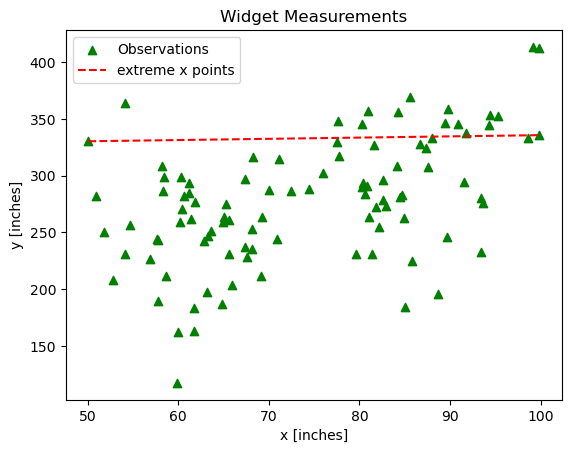

In [3]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...

import matplotlib.pyplot as plt
import pandas as pd

# Reading the csv file
data = pd.read_csv('scatter_data.csv', comment='%')

# Reading the columns
x = data.iloc[:, 0]
y = data.iloc[:, 1]

# Plotting the data points
plt.scatter(x, y, color='green', marker='^', label='Observations')

# Plot the dashed line from the left-most to the right-most point
plt.plot([x.min(), x.max()], [y.loc[x.idxmin()], y.loc[x.idxmax()]], 'r--', label='extreme x points')

# Title of the plot and labels for the axes
plt.title('Widget Measurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')

# Adding a legend
plt.legend()

plt.show()

### Problem 2 - Histogram

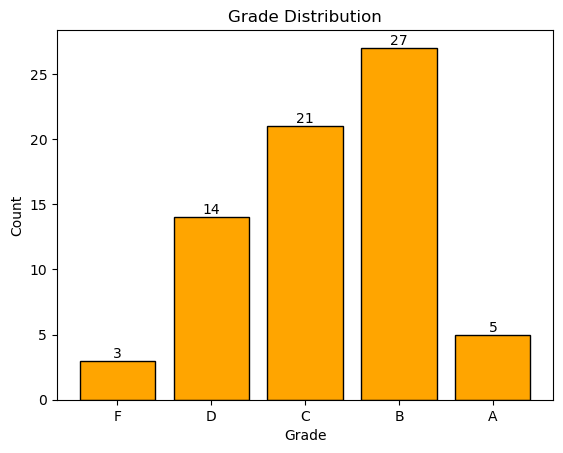

In [4]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reading the csv file
grades_data = pd.read_csv('student_grades.csv', comment='%')

# Extracting the scores
scores = grades_data.iloc[:, 1]

# Defining the score ranges for letter grades
bins = [0, 60, 70, 80, 90, 100]
grade_labels = ['F', 'D', 'C', 'B', 'A']

# Using digitize to assign bins to each score
binned_scores = np.digitize(scores, bins) - 1
grade_counts = [(binned_scores == i).sum() for i in range(len(grade_labels))]

# Creating the bar chart
bars = plt.bar(grade_labels, grade_counts, color='orange', edgecolor='black')

# Adding count labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), 
             ha='center', va='bottom')

# Labelling the axes and add a title
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')

# Showing the plot
plt.show()


In [ ]:
# It's OK to break up your code into multiple cells.

### Problem 3 - Barplot and Boxplot in the Same Figure

In [ ]:
data = pd.read_csv('solution_data.csv', comment='%')
print(data.columns.tolist())

/var/folders/y9/9f1nfls101x067dcz_h3r0rm0000gn/T/ipykernel_44062/2763794256.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heuristic_data.loc[:,'Optimality Gap'] = heuristic_data.apply(


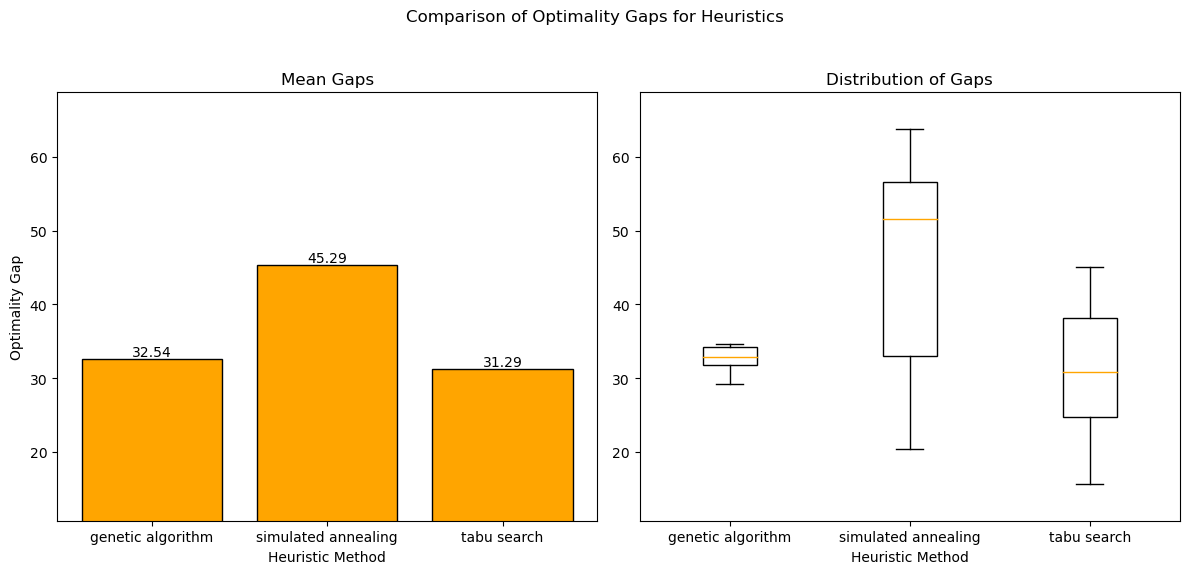

In [5]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...

import pandas as pd
import matplotlib.pyplot as plt

# Reading the csv file
data = pd.read_csv('solution_data.csv', comment='%')

# First column is Problem ID, second column is Solution Method, third column is Value
problem_id_col = 0
solution_method_col = 1
value_col = 2

# Separating the optimal values
optimal_data = data[data.iloc[:, solution_method_col] == 'optimal']
heuristic_data = data[data.iloc[:, solution_method_col] != 'optimal']

# Calculating optimality gaps
optimal_values = optimal_data.set_index(data.columns[problem_id_col])[data.columns[value_col]]
heuristic_data.loc[:,'Optimality Gap'] = heuristic_data.apply(
    lambda row: 100 * (optimal_values[row[data.columns[problem_id_col]]] - row[data.columns[value_col]]) /
    optimal_values[row[data.columns[problem_id_col]]], axis=1)

# Calculating the average optimality gap for each heuristic
average_gaps = heuristic_data.groupby(data.columns[solution_method_col])['Optimality Gap'].mean()

# Creating a figure and a set of 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Barplot for the average optimality gaps
ax[0].bar(average_gaps.index, average_gaps.values, color='orange', edgecolor='black')
ax[0].set_title('Mean Gaps')
ax[0].set_xlabel('Heuristic Method')
ax[0].set_ylabel('Optimality Gap')
ax[0].set_ylim(0, 60)

# Annotating bars with the average gap values
for index, value in enumerate(average_gaps):
    ax[0].text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Boxplot to show the spread of optimality gaps
gaps_data = [group['Optimality Gap'].values for _, group in heuristic_data.groupby(data.columns[solution_method_col])]

ax[1].boxplot(gaps_data, patch_artist=True, medianprops={'color':'orange'}, boxprops=dict(facecolor='white', edgecolor='black'))
ax[1].set_title('Distribution of Gaps')
ax[1].set_xticklabels(average_gaps.index)
ax[1].set_xlabel('Heuristic Method')
ax[1].set_ylim(0, 60)

ymin = min(heuristic_data.loc[:,'Optimality Gap'].min(), average_gaps.min()) - 5  # Adding a margin for clarity
ymax = max(heuristic_data.loc[:,'Optimality Gap'].max(), average_gaps.max()) + 5  # Adding a margin for clarity
ax[0].set_ylim(ymin, ymax)
ax[1].set_ylim(ymin, ymax)

# Overall figure title
fig.suptitle('Comparison of Optimality Gaps for Heuristics')

# Showing the figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



--- 
## Part 2 - Explore New Plot Types

[In this space, provide a concise explanation of your plot.  The reader should be able to read this to learn what kind of plot you're about to create, what type of data you're going to plot, and why you believe it is wise to use this type of plot for this type of data.  (replace these instructions with your actual content, and remove the brackets)]

- **URL of Example Code**:  https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
- **URL of Sample Data**:  https://github.com/mwaskom/seaborn-data/blob/master/iris.csv

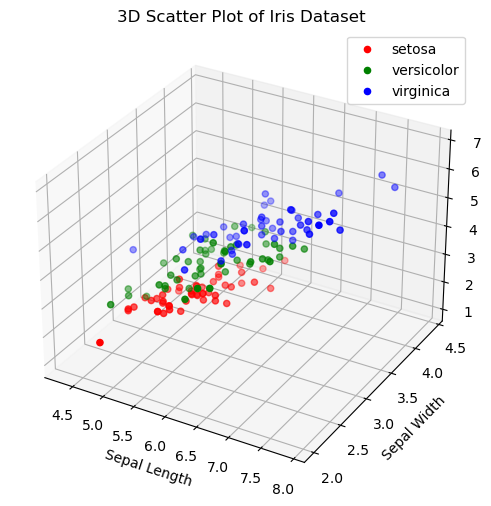

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Iris dataset from Seaborn
iris = sns.load_dataset("iris")

# Creating a 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Defining colors for each species
colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}

# Plotting each data point in 3D space
for species, color in colors.items():
    data = iris[iris['species'] == species]
    ax.scatter(data['sepal_length'], data['sepal_width'], data['petal_length'], c=color, label=species)

# Customizing the plot
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Dataset')

# Adding a legend
ax.legend()

# Showing the 3D Scatter Plot
plt.show()


Notes:

Data Loading: The code begins by loading the Iris dataset from Seaborn using sns.load_dataset. Users can replace "iris" with the name of their own dataset or choose from other available datasets.

Creating a 3D Scatter Plot: It creates a 3D scatter plot by initializing a figure and subplot with plt.figure and fig.add_subplot. Users can modify the figure size and subplot parameters as needed.

Defining Colors: The code defines a dictionary of colors for each species of iris flowers. Users can customize the colors or add more colors for additional species.

Plotting Data: It iterates through each species, filters the data for that species, and then plots it as a scatter plot in 3D space. Users can adapt this part to visualize their own data.

Customizing the Plot: The code customizes the plot by setting labels for the three axes and a title. Users should modify these labels to match their specific dataset.

Adding a Legend: A legend is added to the plot to label each species. Users can change the legend labels or customize its appearance.

Showing the Plot: Finally, the plot is displayed using plt.show(). Users can save the plot as an image or further customize it by adjusting properties such as axis limits, grid lines, or view angles.


Analysis of the Iris dataset, which is a classic dataset in the field of machine learning and statistics. It contains measurements of sepal and petal lengths and widths for three species of Iris flowers: Setosa, Versicolor, and Virginica.

1. **Dataset Overview**:
   - The dataset consists of 150 samples of Iris flowers, with 50 samples per species.
   - Each sample has four features: sepal length, sepal width, petal length, and petal width, all measured in centimeters.
   - The target variable is the species of the Iris flower (categorical).

2. **Data Distribution**:
   - Sepal Length:
     - The sepal length varies from approximately 4.3 to 7.9 cm.
     - On average, Setosa has the shortest sepal length, while Virginica has the longest.
   - Sepal Width:
     - The sepal width ranges from about 2.0 to 4.4 cm.
     - Setosa typically has the widest sepal width, while Versicolor and Virginica have similar sepal widths.
   - Petal Length:
     - The petal length varies from roughly 1.0 to 6.9 cm.
     - Setosa has the shortest petal length, Versicolor has medium-length petals, and Virginica has the longest.
   - Petal Width:
     - Petal width ranges from about 0.1 to 2.5 cm.
     - Setosa has the narrowest petals, while Virginica has the widest.

3. **Species Distinction**:
   - The three Iris species (Setosa, Versicolor, and Virginica) exhibit distinct characteristics in their feature measurements.
   - Setosa typically has shorter sepal and petal lengths and wider sepals.
   - Versicolor falls in the middle for sepal and petal measurements.
   - Virginica has longer sepal and petal lengths and narrower sepals.

4. **Visualization**:
   - The 3D scatter plot in the above code visualizes the relationships between sepal length, sepal width, and petal length for the three species.
   - It's evident that Setosa stands out distinctly from the other two species, making it easy to differentiate.
   - Versicolor and Virginica have some overlap, particularly in the sepal length and sepal width dimensions.

In [ ]:
# It's also OK to include comments, 
# either in Markdown or as Python code comments.

[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.] 